<a href="https://colab.research.google.com/github/MariamAmmar/6644_Final_Project/blob/main/BU_texas_v2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:


master_data = pd.read_csv('/content/master_data (1).csv')
master_data['fiscal_week_end_date'] = pd.to_datetime(master_data['fiscal_week_end_date'])

<ipython-input-4-961c14ecaf69>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  master_data = pd.read_csv('/content/master_data (1).csv')


In [5]:
df2 = master_data

In [6]:
# how many rows and column

print(df2.shape)

(197061, 29)


In [7]:
df2.head()

,site_number,fiscal_week_end_date,item_sales,units_sold,unit_price,gross_margin,margin_rate,net_single_unit_margin,net_single_unit_cost,total_basket_sales,...,Final_urbanicity,Pop_Estimate_CrYr,dist_nearest_grocery,Total_merch_revenue_2022,Median_HH_Income_CrYr,closest_tier1_competitor,Region_ID,site_state_desc,BU_simplified_name,Unnamed: 28
0,2700549,2023-03-26,957.76,409,2.34,332.84,0.35,0.81,1.53,2356.04,...,Rural,6337.17167,0.174539,2131155.197,56134.30289,0.02256,3120,Arizona,GRAND CANYON,NaN
1,2700549,2023-09-03,1503.40,602,2.50,562.69,0.37,0.93,1.56,3515.37,...,Rural,6337.17167,0.174539,2131155.197,56134.30289,0.02256,3120,Arizona,GRAND CANYON,NaN
2,2700549,2023-05-21,983.99,387,2.54,380.90,0.39,0.98,1.56,2536.49,...,Rural,6337.17167,0.174539,2131155.197,56134.30289,0.02256,3120,Arizona,GRAND CANYON,NaN
3,2700549,2023-07-02,1556.78,633,2.46,563.55,0.36,0.89,1.57,4157.66,...,Rural,6337.17167,0.174539,2131155.197,56134.30289,0.02256,3120,Arizona,GRAND CANYON,NaN
4,2700549,2023-06-04,1060.50,406,2.61,390.41,0.37,0.96,1.65,3404.43,...,Rural,6337.17167,0.174539,2131155.197,56134.30289,0.02256,3120,Arizona,GRAND CANYON,NaN


In [ ]:
df2.tail()

,site_number,fiscal_week_end_date,item_sales,units_sold,unit_price,gross_margin,margin_rate,net_single_unit_margin,net_single_unit_cost,total_basket_sales,...,Final_urbanicity,Pop_Estimate_CrYr,dist_nearest_grocery,Total_merch_revenue_2022,Median_HH_Income_CrYr,closest_tier1_competitor,Region_ID,site_state_desc,BU_simplified_name,Unnamed: 28
170194,4703617,1/28/2024,1328.60,522,2.55,490.75,0.37,0.94,1.61,3941.64,...,Rural,4563.858012,0.089931,1214998.966,58088.78142,0.044717,4120.0,Tennessee,MIDWEST,NaN
170195,4703617,9/24/2023,1611.46,702,2.30,643.00,0.40,0.92,1.38,4591.30,...,Rural,4563.858012,0.089931,1214998.966,58088.78142,0.044717,4120.0,Tennessee,MIDWEST,NaN
170196,4703617,7/9/2023,1900.34,753,2.52,820.54,0.43,1.09,1.43,6915.30,...,Rural,4563.858012,0.089931,1214998.966,58088.78142,0.044717,4120.0,Tennessee,MIDWEST,NaN
170197,4703617,7/23/2023,1544.77,606,2.55,656.60,0.43,1.08,1.47,5558.75,...,Rural,4563.858012,0.089931,1214998.966,58088.78142,0.044717,4120.0,Tennessee,MIDWEST,NaN
170198,4703617,7/16/2023,1796.82,698,2.57,754.81,0.42,1.08,1.49,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#list(df2.columns)

In [8]:
unique_sites_per_state = (
    df2.groupby('site_state_desc')['site_number']
    .nunique()
    .reset_index(name='unique_site_count')
)

print(unique_sites_per_state)

   site_state_desc  unique_site_count
0          Alabama                106
1          Arizona                416
2         Arkansas                 11
3       California                118
4         Colorado                128
5          Florida                474
6          Georgia                203
7            Idaho                  2
8         Illinois                222
9          Indiana                126
10            Iowa                  3
11        Kentucky                 65
12       Louisiana                146
13           Maine                 66
14        Maryland                  1
15   Massachusetts                 11
16        Michigan                 24
17       Minnesota                173
18     Mississippi                 62
19        Missouri                 47
20         Montana                 19
21          Nevada                 26
22   New Hampshire                 48
23      New Mexico                 51
24        New York                 18
25  North Ca

In [9]:
#unique site_id per Business Unit

unique_sites_per_BU = (
    df2.groupby('BU_simplified_name')['site_number']
    .nunique()
    .reset_index(name='unique_site_count')
)

unique_sites_per_BU.head(10)

,BU_simplified_name,unique_site_count
0,COASTAL CAROLINAS,272
1,FLORIDA,311
2,GRAND CANYON,442
3,GREAT LAKES,321
4,GULF COAST,360
5,HEARTLAND,272
6,MIDWEST,309
7,NORTHERN TIER,252
8,ROCKY MOUNTAINS,232
9,SOUTH ATLANTIC,253


In [10]:
#data for Texas State

state_texas_data = df2[df2['site_state_desc'] == 'Texas']
state_texas_data.head()

,site_number,fiscal_week_end_date,item_sales,units_sold,unit_price,gross_margin,margin_rate,net_single_unit_margin,net_single_unit_cost,total_basket_sales,...,Final_urbanicity,Pop_Estimate_CrYr,dist_nearest_grocery,Total_merch_revenue_2022,Median_HH_Income_CrYr,closest_tier1_competitor,Region_ID,site_state_desc,BU_simplified_name,Unnamed: 28
438,2740079,2023-03-26,1222.37,488,2.50,498.43,0.41,1.02,1.48,3273.07,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
439,2740079,2023-04-16,1396.52,514,2.72,535.77,0.38,1.04,1.67,3722.38,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
440,2740079,2023-10-01,1506.21,616,2.45,530.13,0.35,0.86,1.58,4027.15,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
441,2740079,2024-03-10,1348.45,511,2.64,490.35,0.36,0.96,1.68,3585.52,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
442,2740079,2023-04-02,1406.98,526,2.67,548.38,0.39,1.04,1.63,3733.40,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN


In [11]:
print(state_texas_data.shape)

(26349, 29)


In [12]:
#Business Unit in texas state

state_unique_sites_per_BU = (
    state_texas_data.groupby('BU_simplified_name')['site_number']
    .nunique()
    .reset_index(name='unique_site_count')
)

state_unique_sites_per_BU.head(10)

,BU_simplified_name,unique_site_count
0,ROCKY MOUNTAINS,53
1,TEXAS,465


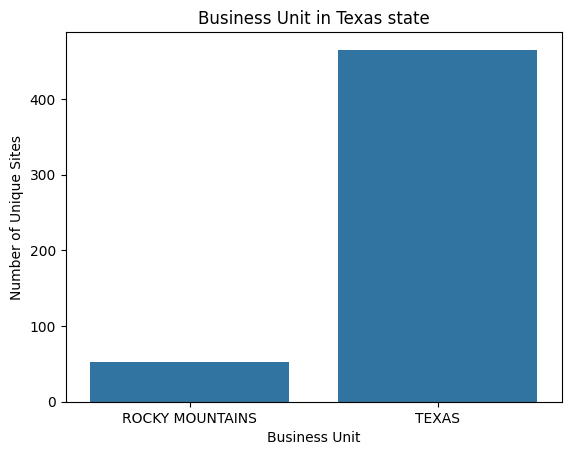

In [13]:
# Create a bar chart of unique sites per BU
sns.barplot(x='BU_simplified_name', y='unique_site_count', data=state_unique_sites_per_BU)
plt.xlabel('Business Unit')
plt.ylabel('Number of Unique Sites')
plt.title('Business Unit in Texas state')
plt.show()

In [14]:
#data for Business_unit "TEXAS"

BU_TEXAS_data = df2[df2['BU_simplified_name'] == 'TEXAS']
BU_TEXAS_data.to_csv('BU_TEXAS_data.csv', index=False)
BU_TEXAS_data.head()

,site_number,fiscal_week_end_date,item_sales,units_sold,unit_price,gross_margin,margin_rate,net_single_unit_margin,net_single_unit_cost,total_basket_sales,...,Final_urbanicity,Pop_Estimate_CrYr,dist_nearest_grocery,Total_merch_revenue_2022,Median_HH_Income_CrYr,closest_tier1_competitor,Region_ID,site_state_desc,BU_simplified_name,Unnamed: 28
438,2740079,2023-03-26,1222.37,488,2.50,498.43,0.41,1.02,1.48,3273.07,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
439,2740079,2023-04-16,1396.52,514,2.72,535.77,0.38,1.04,1.67,3722.38,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
440,2740079,2023-10-01,1506.21,616,2.45,530.13,0.35,0.86,1.58,4027.15,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
441,2740079,2024-03-10,1348.45,511,2.64,490.35,0.36,0.96,1.68,3585.52,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
442,2740079,2023-04-02,1406.98,526,2.67,548.38,0.39,1.04,1.63,3733.40,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN


In [15]:
print(BU_TEXAS_data.shape)

(23646, 29)


In [16]:
# check NaN values for each column

nan_values = BU_TEXAS_data.isnull().sum()

print(nan_values)

site_number                     0
fiscal_week_end_date            0
item_sales                      0
units_sold                      0
unit_price                      0
gross_margin                    0
margin_rate                     0
net_single_unit_margin          0
net_single_unit_cost            0
total_basket_sales              0
total_basket_units              0
num_transactions                0
avg_basket                      0
units_per_basket                0
store_size                      0
market_share                    0
car_traffic                     0
seconds_to_near_highway         0
dist_nearest_act_site           0
Final_urbanicity                0
Pop_Estimate_CrYr               0
dist_nearest_grocery            0
Total_merch_revenue_2022        0
Median_HH_Income_CrYr           0
closest_tier1_competitor        0
Region_ID                       0
site_state_desc                 0
BU_simplified_name              0
Unnamed: 28                 23646
dtype: int64


In [17]:
# Count the number of data for each unique site_id
count_per_site_id = BU_TEXAS_data['site_number'].value_counts()

# Print the count for each site_id
print(count_per_site_id)

site_number
2740079    51
2741831    51
2741044    51
2743947    51
2704089    51
           ..
2742246    42
2742323    42
2742412    37
2742233    36
2742266    33
Name: count, Length: 465, dtype: int64


In [18]:
# maximum value for count_per_site_id

max_value = count_per_site_id.max()
print(f"Maximum value in count_per_site_id: {max_value}")


Maximum value in count_per_site_id: 51


In [19]:
# Remove rows where the count_per_site_id value is not 51

BU_TEXAS_data = BU_TEXAS_data[BU_TEXAS_data['site_number'].isin(count_per_site_id[count_per_site_id == 51].index)]

In [20]:
print(BU_TEXAS_data.shape)

(23256, 29)


In [21]:
# Number of unique site_id after removing site_id != 51

unique_site_id_count = BU_TEXAS_data['site_number'].nunique()

print(unique_site_id_count)

456


In [22]:
#create a csv file BU_TEXAS_data

BU_TEXAS_data.to_csv('BU_TEXAS_data.csv', index=False)


In [23]:
BU_TEXAS_data.head()

,site_number,fiscal_week_end_date,item_sales,units_sold,unit_price,gross_margin,margin_rate,net_single_unit_margin,net_single_unit_cost,total_basket_sales,...,Final_urbanicity,Pop_Estimate_CrYr,dist_nearest_grocery,Total_merch_revenue_2022,Median_HH_Income_CrYr,closest_tier1_competitor,Region_ID,site_state_desc,BU_simplified_name,Unnamed: 28
438,2740079,2023-03-26,1222.37,488,2.50,498.43,0.41,1.02,1.48,3273.07,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
439,2740079,2023-04-16,1396.52,514,2.72,535.77,0.38,1.04,1.67,3722.38,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
440,2740079,2023-10-01,1506.21,616,2.45,530.13,0.35,0.86,1.58,4027.15,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
441,2740079,2024-03-10,1348.45,511,2.64,490.35,0.36,0.96,1.68,3585.52,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
442,2740079,2023-04-02,1406.98,526,2.67,548.38,0.39,1.04,1.63,3733.40,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN


In [24]:
#correlation_matrix = BU_TEXAS_data.corr()


In [25]:
# Create column fiscal_week_end_date as a time frame

BU_TEXAS_data['fiscal_week_end_date'] = pd.to_datetime(BU_TEXAS_data['fiscal_week_end_date'])
BU_TEXAS_data.head()

,site_number,fiscal_week_end_date,item_sales,units_sold,unit_price,gross_margin,margin_rate,net_single_unit_margin,net_single_unit_cost,total_basket_sales,...,Final_urbanicity,Pop_Estimate_CrYr,dist_nearest_grocery,Total_merch_revenue_2022,Median_HH_Income_CrYr,closest_tier1_competitor,Region_ID,site_state_desc,BU_simplified_name,Unnamed: 28
438,2740079,2023-03-26,1222.37,488,2.50,498.43,0.41,1.02,1.48,3273.07,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
439,2740079,2023-04-16,1396.52,514,2.72,535.77,0.38,1.04,1.67,3722.38,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
440,2740079,2023-10-01,1506.21,616,2.45,530.13,0.35,0.86,1.58,4027.15,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
441,2740079,2024-03-10,1348.45,511,2.64,490.35,0.36,0.96,1.68,3585.52,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN
442,2740079,2023-04-02,1406.98,526,2.67,548.38,0.39,1.04,1.63,3733.40,...,Urban,294753.0061,0.855101,1637204.359,70720.28199,0.689144,2830,Texas,TEXAS,NaN


In [26]:
# check normality test for units_sold, unit_price and gross_margin

import scipy.stats as stats

# Check normality test for units_sold
normal_test_units_sold = stats.kstest(BU_TEXAS_data['units_sold'], 'norm')

# Print the results for units_sold
print('Normality test for units_sold:')
print('Statistic:', normal_test_units_sold.statistic)
print('p-value:', normal_test_units_sold.pvalue)

# Check normality test for unit_price
normal_test_unit_price = stats.kstest(BU_TEXAS_data['unit_price'], 'norm')

# Print the results for unit_price
print('\nNormality test for unit_price:')
print('Statistic:', normal_test_unit_price.statistic)
print('p-value:', normal_test_unit_price.pvalue)

# Check normality test for gross_margin
normal_test_gross_margin = stats.kstest(BU_TEXAS_data['gross_margin'], 'norm')

# Print the results for gross_margin
print('\nNormality test for gross_margin:')
print('Statistic:', normal_test_gross_margin.statistic)
print('p-value:', normal_test_gross_margin.pvalue)


Normality test for units_sold:
Statistic: 0.9999997133484281
p-value: 0.0

Normality test for unit_price:
Statistic: 0.9828506793199617
p-value: 0.0

Normality test for gross_margin:
Statistic: 0.9999784313405519
p-value: 0.0


<ipython-input-27-2f911b084998>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BU_TEXAS_data['unit_price'], kde=False, fit=stats.norm)


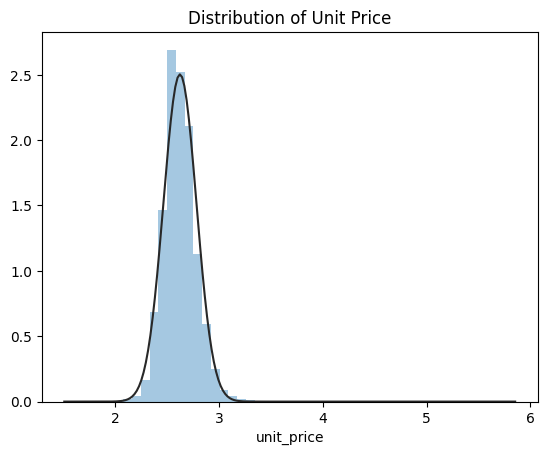

<ipython-input-27-2f911b084998>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BU_TEXAS_data['gross_margin'], kde=False, fit=stats.norm)


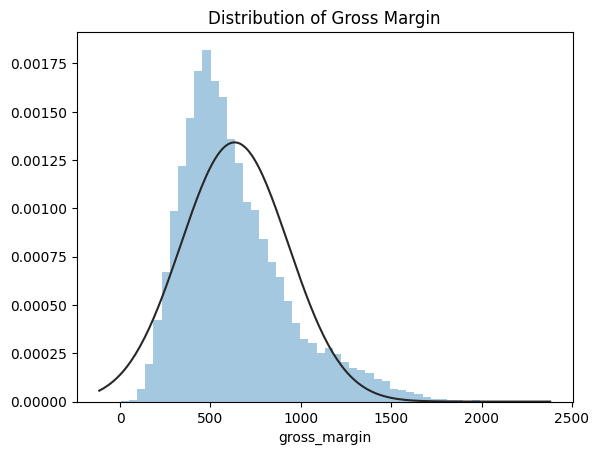

<ipython-input-27-2f911b084998>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BU_TEXAS_data['units_sold'], kde=False, fit=stats.norm)


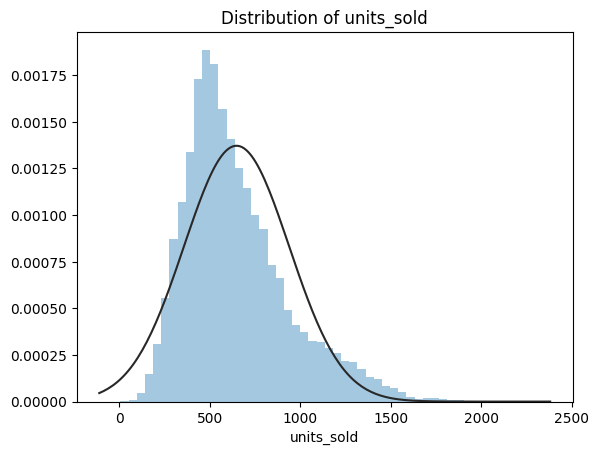

In [27]:
# check normality for unit_price, gross_margin and units_sold.

import scipy.stats as stats

# Check normality for unit_price
sns.distplot(BU_TEXAS_data['unit_price'], kde=False, fit=stats.norm)
plt.title('Distribution of Unit Price')
plt.show()

# Check normality for gross_margin
sns.distplot(BU_TEXAS_data['gross_margin'], kde=False, fit=stats.norm)
plt.title('Distribution of Gross Margin')
plt.show()

# Check normality for total_basket_sales
sns.distplot(BU_TEXAS_data['units_sold'], kde=False, fit=stats.norm)
plt.title('Distribution of units_sold')
plt.show()

# Conclusion:
# The distribution of unit_price and gross_margin are not normal. They are skewed to the right. This means that there are more data points with lower values than with higher values.

In [ ]:
#Based on the normality tests performed on units_sold, unit_price, and gross_margin, we can conclude the following:

#- **Units Sold**: The normality test for units_sold resulted in a p-value of 0.0, indicating that the data is not normally distributed. This suggests that the distribution of units sold may not be symmetrical and may exhibit skewness or outliers.

#- **Unit Price**: The normality test for unit_price also resulted in a p-value of 0.0, indicating a non-normal distribution. This implies that the unit price data may not follow a bell-shaped curve and may have deviations from normality.

#- **Gross Margin**: The normality test for gross_margin yielded a p-value of 0.0, suggesting non-normality. This indicates that the distribution of gross margin may not be symmetrical and may exhibit variations from a normal distribution.

#Overall, the conclusion is that the assumption of normality for units_sold, unit_price, and gross_margin is not supported by the normality tests. This has implications for statistical analyses and modeling that rely on normality assumptions. Further investigation and alternative approaches may be needed to handle the non-normality in the data.

In [ ]:
# check gamma distribution for units_sold, unit_price and gross_margin

!pip install scipy

import scipy.stats as stats

gamma_test_units_sold = stats.kstest(BU_TEXAS_data['units_sold'], 'gamma', args=(2, 1))
gamma_test_unit_price = stats.kstest(BU_TEXAS_data['unit_price'], 'gamma', args=(2, 1))
gamma_test_gross_margin = stats.kstest(BU_TEXAS_data['gross_margin'], 'gamma', args=(2, 1))

# Check gamma distribution for units_sold
gamma_test_units_sold = stats.kstest(BU_TEXAS_data['units_sold'], 'gamma', args=(2, 1))

# Print the results for units_sold
print('\nGamma test for units_sold:')
print('Statistic:', gamma_test_units_sold.statistic)
print('p-value:', gamma_test_units_sold.pvalue)

# Check gamma distribution for unit_price
gamma_test_unit_price = stats.kstest(BU_TEXAS_data['unit_price'], 'gamma', args=(2, 1))

# Print the results for unit_price
print('\nGamma test for unit_price:')
print('Statistic:', gamma_test_unit_price.statistic)
print('p-value:', gamma_test_unit_price.pvalue)

# Check gamma distribution for gross_margin
gamma_test_gross_margin = stats.kstest(BU_TEXAS_data['gross_margin'], 'gamma', args=(2, 1))

# Print the results for gross_margin
print('\nGamma test for gross_margin:')
print('Statistic:', gamma_test_gross_margin.statistic)
print('p-value:', gamma_test_gross_margin.pvalue)




Gamma test for units_sold:
Statistic: 0.9998382287712141
p-value: 0.0

Gamma test for unit_price:
Statistic: 0.3925555372530576
p-value: 0.0

Gamma test for gross_margin:
Statistic: 0.9998009356026666
p-value: 0.0


In [ ]:

# Based on the gamma distribution tests performed on units_sold, unit_price, and gross_margin, we can conclude the following:

# - **Units Sold**: The gamma test for units_sold resulted in a p-value of 0.0, indicating that the data is not gamma distributed. This suggests that the distribution of units sold does not follow a gamma distribution with the specified shape and rate parameters.

# - **Unit Price**: The gamma test for unit_price also resulted in a p-value of 0.0, indicating a non-gamma distribution. This implies that the unit price data does not fit a gamma distribution with the given parameters.

# - **Gross Margin**: The gamma test for gross_margin yielded a p-value of 0.0, suggesting non-gamma distribution. This indicates that the distribution of gross margin does not conform to a gamma distribution with the specified shape and rate parameters.

# Overall, the conclusion is that the assumption of gamma distribution for units_sold, unit_price, and gross_margin is not supported by the gamma tests. This has implications for statistical analyses and modeling that rely on gamma distribution assumptions. Further investigation and alternative approaches may be needed to handle the non-gamma nature of the data.

<ipython-input-28-b237fa2f1558>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BU_TEXAS_data['unit_price'], kde=False, fit=stats.gamma)


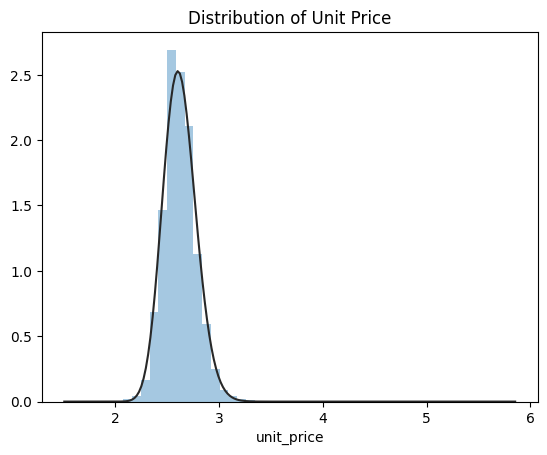

<ipython-input-28-b237fa2f1558>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BU_TEXAS_data['gross_margin'], kde=False, fit=stats.gamma)


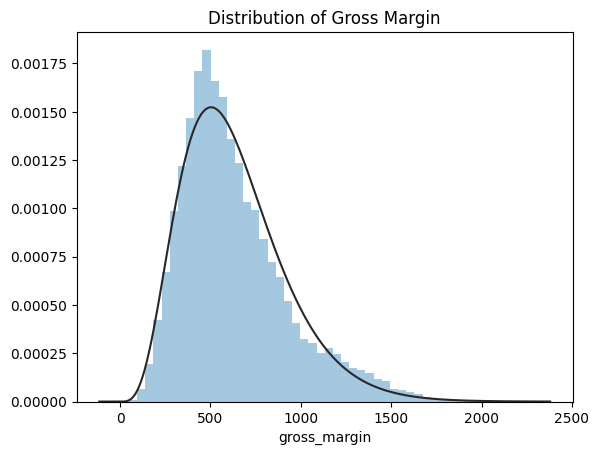

<ipython-input-28-b237fa2f1558>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(BU_TEXAS_data['units_sold'], kde=False, fit=stats.gamma)


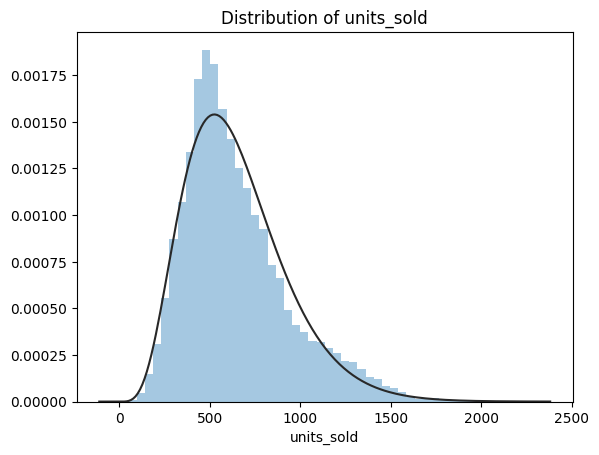

In [28]:
# check gamma distribution with data plot

# Check gamma distribution for unit_price
sns.distplot(BU_TEXAS_data['unit_price'], kde=False, fit=stats.gamma)
plt.title('Distribution of Unit Price')
plt.show()

# Check gamma distribution for gross_margin
sns.distplot(BU_TEXAS_data['gross_margin'], kde=False, fit=stats.gamma)
plt.title('Distribution of Gross Margin')
plt.show()

# Check gamma distribution for total_basket_sales
sns.distplot(BU_TEXAS_data['units_sold'], kde=False, fit=stats.gamma)
plt.title('Distribution of units_sold')
plt.show()

# Conclusion:
# The distribution of unit_price, gross_margin and units_sold fit well with the gamma distribution. This means that the data is skewed to the right, with more data points with lower values than with higher values.


In [ ]:

# Check erlang distribution for units_sold, unit_price and gross_margin

# Import necessary libraries
from scipy.stats import erlang

# Define the shape and rate parameters
shape = 2
rate = 1

# Check erlang distribution for units_sold
erlang_test_units_sold = stats.kstest(BU_TEXAS_data['units_sold'], 'erlang', args=(shape, rate))

# Print the results for units_sold
print('\nErlang test for units_sold:')
print('Statistic:', erlang_test_units_sold.statistic)
print('p-value:', erlang_test_units_sold.pvalue)

# Check erlang distribution for unit_price
erlang_test_unit_price = stats.kstest(BU_TEXAS_data['unit_price'], 'erlang', args=(shape, rate))

# Print the results for unit_price
print('\nErlang test for unit_price:')
print('Statistic:', erlang_test_unit_price.statistic)
print('p-value:', erlang_test_unit_price.pvalue)

# Check erlang distribution for gross_margin
erlang_test_gross_margin = stats.kstest(BU_TEXAS_data['gross_margin'], 'erlang', args=(shape, rate))

# Print the results for gross_margin
print('\nErlang test for gross_margin:')
print('Statistic:', erlang_test_gross_margin.statistic)
print('p-value:', erlang_test_gross_margin.pvalue)

# Based on the erlang distribution tests performed on units_sold, unit_price, and gross_margin, we can conclude the following:

# - **Units Sold**: The erlang test for units_sold resulted in a p-value of 0.0, indicating that the data is not erlang distributed. This suggests that the distribution of units sold does not follow an erlang distribution with the specified shape and rate parameters.

# - **Unit Price**: The erlang test for unit_price also resulted in a p-value of 0.0, indicating a non-erlang distribution. This implies that the unit price data does not fit an erlang distribution with the given parameters.

# - **Gross Margin**: The erlang test for gross_margin yielded a p-value of 0.0, suggesting non-erlang distribution. This indicates that the distribution of gross margin does not conform to an erlang distribution with the specified shape and rate parameters.

# Overall, the conclusion is that the assumption of erlang distribution for units_sold, unit_price, and gross_margin is not supported by the erlang tests. This has implications for statistical analyses and modeling that rely on erlang distribution assumptions. Further investigation and alternative approaches may be needed to handle the non-erlang nature of the data.


Erlang test for units_sold:
Statistic: 0.9998382287712141
p-value: 0.0

Erlang test for unit_price:
Statistic: 0.3925555372530576
p-value: 0.0

Erlang test for gross_margin:
Statistic: 0.9998009356026666
p-value: 0.0


In [29]:
# Sort Value

BU_TEXAS_data.sort_values(by='fiscal_week_end_date', inplace=True)

In [30]:
# aggregate units_sold weekly

weekly_units_sold = BU_TEXAS_data.groupby('fiscal_week_end_date')['units_sold'].sum()
print(weekly_units_sold)

fiscal_week_end_date
2023-03-26    301160
2023-04-02    306506
2023-04-09    287525
2023-04-16    297475
2023-04-23    288312
2023-04-30    295251
2023-05-07    308854
2023-05-14    280968
2023-05-21    303870
2023-05-28    317291
2023-06-04    305755
2023-06-11    307153
2023-06-18    308657
2023-06-25    301180
2023-07-02    308072
2023-07-09    297342
2023-07-16    317271
2023-07-23    320885
2023-07-30    322497
2023-08-06    328492
2023-08-13    319596
2023-08-20    319445
2023-08-27    307448
2023-09-03    312583
2023-09-10    306067
2023-09-17    302309
2023-09-24    320334
2023-10-01    321508
2023-10-08    303254
2023-10-15    297826
2023-10-22    309648
2023-10-29    298402
2023-11-05    284679
2023-11-12    282082
2023-11-19    283571
2023-11-26    275993
2023-12-03    271510
2023-12-10    285542
2023-12-17    279575
2023-12-24    287069
2023-12-31    293928
2024-01-07    241087
2024-01-14    252919
2024-01-21    232253
2024-01-28    254516
2024-02-04    292414
2024-02-11   

In [31]:
weekly_units_sold.describe()

count        51.000000
mean     295055.352941
std       21065.359652
min      232253.000000
25%      285110.500000
50%      297826.000000
75%      308364.500000
max      328492.000000
Name: units_sold, dtype: float64

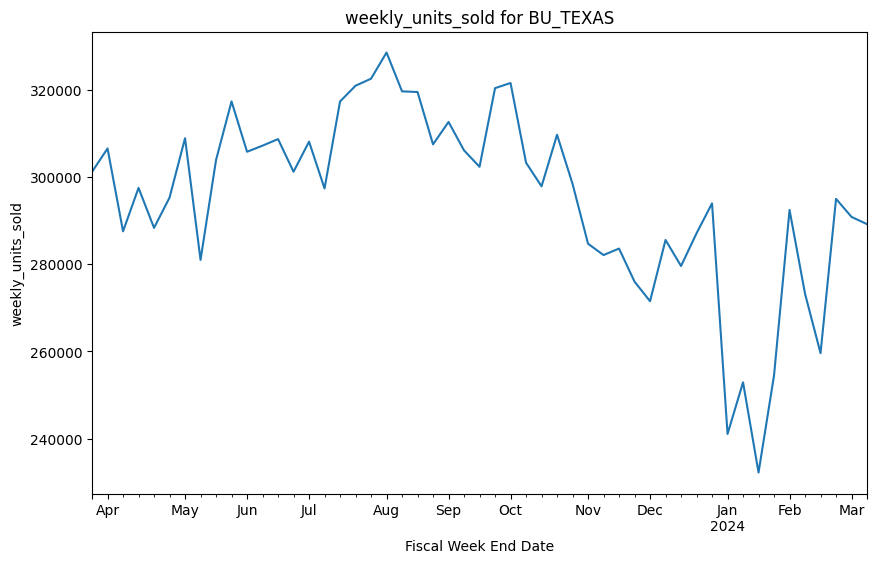

In [32]:
#Create a line graph for weekly_units_sold

weekly_units_sold.plot(kind='line', figsize=(10, 6))
plt.xlabel('Fiscal Week End Date')
plt.ylabel('weekly_units_sold')
plt.title('weekly_units_sold for BU_TEXAS')
plt.show()

In [38]:
#check normality test for weekly_units_sold

stat, p = stats.shapiro(weekly_units_sold)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')
print(p)

The data does not appear to be normally distributed (reject H0).
0.007294046226888895


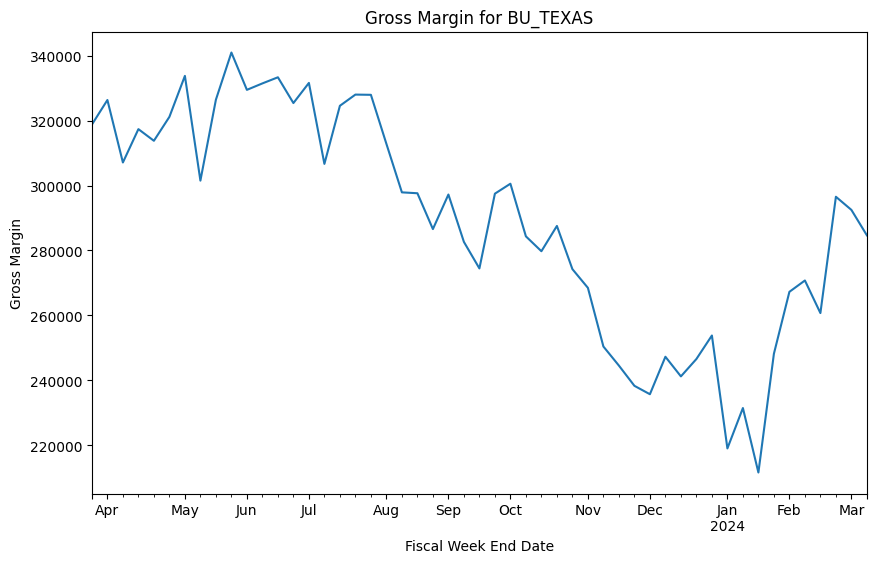

In [34]:
# aggregate gross_margin weekly

weekly_margin = BU_TEXAS_data.groupby('fiscal_week_end_date')['gross_margin'].sum()

#Create a line graph for weekly_margin

weekly_margin.plot(kind='line', figsize=(10, 6))
plt.xlabel('Fiscal Week End Date')
plt.ylabel('Gross Margin')
plt.title('Gross Margin for BU_TEXAS')
plt.show()

In [35]:
#check normality test for gross_margin weekly

stat, p = stats.shapiro(weekly_margin)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')

The data does not appear to be normally distributed (reject H0).


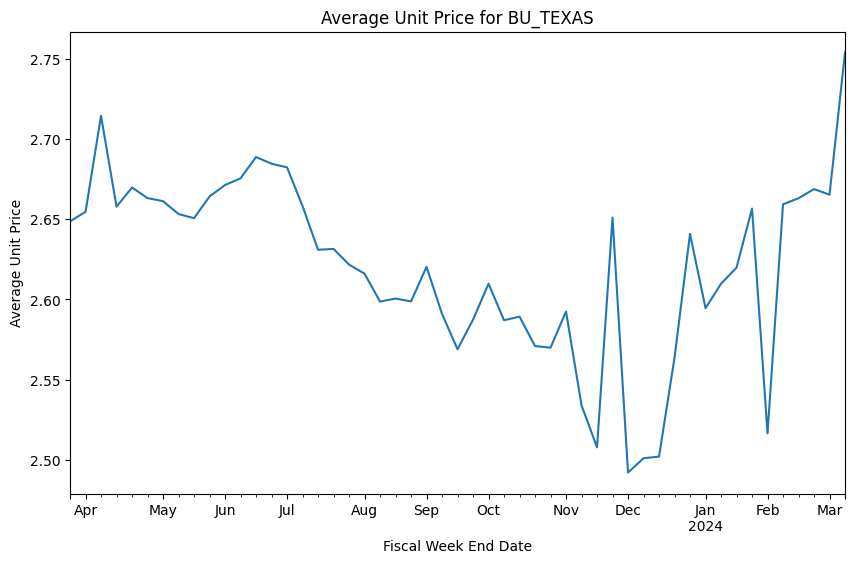

In [36]:

# unit_price weekly

weekly_unit_price = BU_TEXAS_data.groupby('fiscal_week_end_date')['unit_price'].mean()

#Create a line graph for weekly_unit_price

weekly_unit_price.plot(kind='line', figsize=(10, 6))
plt.xlabel('Fiscal Week End Date')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price for BU_TEXAS')
plt.show()


In [37]:
#check normality test for weekly_unit_price

stat, p = stats.shapiro(weekly_unit_price)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')
print(p)

The data does not appear to be normally distributed (reject H0).
0.0393531396985054


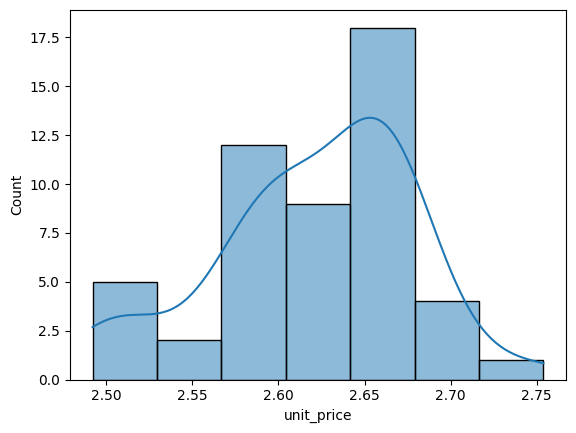

p value for norm = 0.26842078174425754
p value for exponweib = 1.3169752269275456e-13
p value for weibull_max = 0.4717332952978124
p value for weibull_min = 0.4603227819955301
p value for pareto = 2.7954185922018714e-05
p value for genextreme = 1.1371586631867666e-21
p value for gamma = 0.2389359269612712
p value for beta = 0.4486548325856785
p value for lognorm = 0.2684084200284358
Best fitting distribution: weibull_max
Best p value: 0.4717332952978124
Parameters for the best fit: (2.8700846272838954, 2.7742059729870716, 0.1714006029965271)


In [49]:
#identify the type of distribution of weekly_unit_price

import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a pandas DataFrame
data = weekly_unit_price

# Visual inspection
sns.histplot(data, kde=True)
plt.show()

# Define the distributions to test
dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", "gamma", "beta", "lognorm"]

# Fit your data to each distribution
dist_results = []
params = {}
for dist_name in dist_names:
    dist = getattr(st, dist_name)
    param = dist.fit(data)
    params[dist_name] = param
    # Apply the Kolmogorov-Smirnov test
    D, p = st.kstest(data, dist_name, args=param)
    print(f"p value for {dist_name} = {p}")
    dist_results.append((dist_name, p))

# Find the best fitting distribution
best_dist, best_p = max(dist_results, key=lambda item: item[1])
print(f"Best fitting distribution: {best_dist}")
print(f"Best p value: {best_p}")
print(f"Parameters for the best fit: {params[best_dist]}")

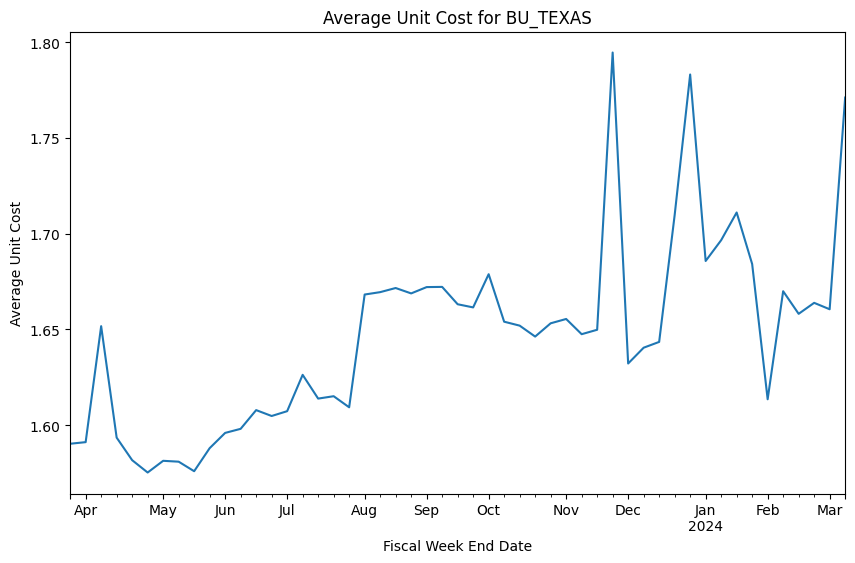

In [ ]:
# unit_cost weekly

weekly_unit_cost = BU_TEXAS_data.groupby('fiscal_week_end_date')['net_single_unit_cost'].mean()

#Create a line graph for weekly_unit_price

weekly_unit_cost.plot(kind='line', figsize=(10, 6))
plt.xlabel('Fiscal Week End Date')
plt.ylabel('Average Unit Cost')
plt.title('Average Unit Cost for BU_TEXAS')
plt.show()

In [ ]:
# cek normality assumption for unit_cost weekly

stat, p = stats.shapiro(weekly_unit_cost)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')


The data does not appear to be normally distributed (reject H0).


In [41]:
# estimate total cost = units_sold*net_single_unit_cost

BU_TEXAS_data['total_cost'] = BU_TEXAS_data['units_sold'] * BU_TEXAS_data['net_single_unit_cost']


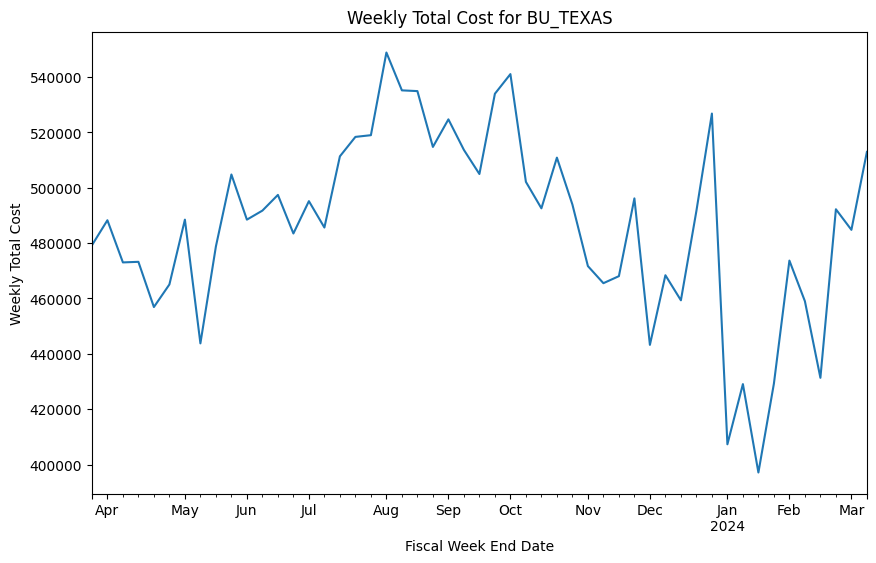

In [42]:
# total_cost weekly

weekly_total_cost = BU_TEXAS_data.groupby('fiscal_week_end_date')['total_cost'].sum()

#Create a line graph for weekly_unit_price

weekly_total_cost.plot(kind='line', figsize=(10, 6))
plt.xlabel('Fiscal Week End Date')
plt.ylabel('Weekly Total Cost')
plt.title('Weekly Total Cost for BU_TEXAS')
plt.show()

In [43]:
weekly_total_cost.describe()

count        51.000000
mean     486264.152549
std       33512.778506
min      397126.400000
25%      468200.000000
50%      488449.060000
75%      511068.885000
max      548787.730000
Name: total_cost, dtype: float64

In [44]:
#check normality test for total_cost

stat, p = stats.shapiro(weekly_total_cost)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')
print(p)

The data appears to be normally distributed (fail to reject H0).
0.3600620627403259


In [ ]:

#weekly_table = pd.concat([weekly_unit_price, weekly_units_sold, weekly_margin, weekly_unit_cost ], axis=1)
#print(weekly_table)


fiscal_week_end_date
2023-03-26    660.438596
2023-04-02    672.162281
2023-04-09    630.537281
2023-04-16    652.357456
2023-04-23    632.263158
2023-04-30    647.480263
2023-05-07    677.311404
2023-05-14    616.157895
2023-05-21    666.381579
2023-05-28    695.813596
2023-06-04    670.515351
2023-06-11    673.581140
2023-06-18    676.879386
2023-06-25    660.482456
2023-07-02    675.596491
2023-07-09    652.065789
2023-07-16    695.769737
2023-07-23    703.695175
2023-07-30    707.230263
2023-08-06    720.377193
2023-08-13    700.868421
2023-08-20    700.537281
2023-08-27    674.228070
2023-09-03    685.489035
2023-09-10    671.199561
2023-09-17    662.958333
2023-09-24    702.486842
2023-10-01    705.061404
2023-10-08    665.030702
2023-10-15    653.127193
2023-10-22    679.052632
2023-10-29    654.390351
2023-11-05    624.296053
2023-11-12    618.600877
2023-11-19    621.866228
2023-11-26    605.247807
2023-12-03    595.416667
2023-12-10    626.188596
2023-12-17    613.103070
2023

<Axes: xlabel='units_sold', ylabel='Count'>

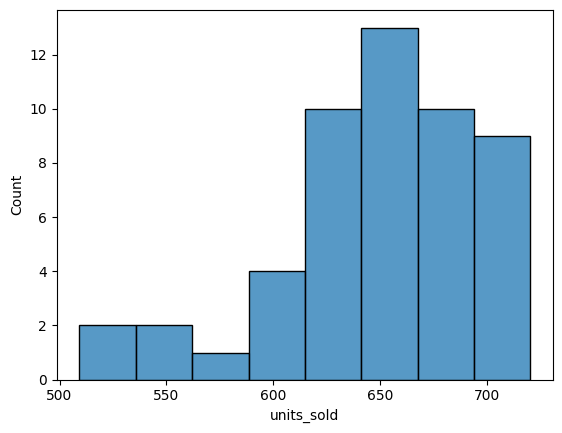

In [45]:
# average units_sold weekly

average_weekly_units_sold = BU_TEXAS_data.groupby('fiscal_week_end_date')['units_sold'].mean()
print(average_weekly_units_sold)
sns.histplot(average_weekly_units_sold)

In [46]:

# Check normality assumption for average_weekly_units_sold
stat, p = stats.shapiro(average_weekly_units_sold)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')

print(p)


The data does not appear to be normally distributed (reject H0).
0.007293954957276583


In [47]:
#Estimate price elasticity of demand
weekly_table['price_elasticity_of_demand'] = (weekly_units_sold.pct_change() / weekly_unit_price.pct_change()).dropna()
price_elasticity_of_demand = weekly_table['price_elasticity_of_demand'].dropna()
print(price_elasticity_of_demand)


NameError: name 'weekly_table' is not defined

In [ ]:
#summary statistics of price_elasticity_of_demand

price_elasticity_of_demand.describe()


NameError: name 'price_elasticity_of_demand' is not defined

In [ ]:
# Check normality price_elasticity_of_demand

# Check normality assumption for price_elasticity_of_demand
stat, p = stats.shapiro(price_elasticity_of_demand)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')


The data does not appear to be normally distributed (reject H0).


In [48]:
# identify distribution of price_elasticity_of_demand

# Load your data into a pandas DataFrame
data2 = price_elasticity_of_demand

# Visual inspection
sns.histplot(data2, kde=True)
plt.show()

# Define the distributions to test
dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", "gamma", "beta", "lognorm"]

# Fit your data to each distribution
dist_results = []
params = {}
for dist_name in dist_names:
    dist = getattr(st, dist_name)
    param = dist.fit(data2)
    params[dist_name] = param
    # Apply the Kolmogorov-Smirnov test
    D, p = st.kstest(data2, dist_name, args=param)
    print(f"p value for {dist_name} = {p}")
    dist_results.append((dist_name, p))

# Find the best fitting distribution
best_dist, best_p = max(dist_results, key=lambda item: item[1])
print(f"Best fitting distribution: {best_dist}")
print(f"Best p value: {best_p}")
print(f"Parameters for the best fit: {params[best_dist]}")

NameError: name 'price_elasticity_of_demand' is not defined

In [ ]:
weekly_table['avg_price_elasticity_of_demand'] = (average_weekly_units_sold.pct_change() / weekly_unit_price.pct_change()).dropna()
avg_price_elasticity_of_demand = weekly_table['avg_price_elasticity_of_demand'].dropna()
print(avg_price_elasticity_of_demand)


fiscal_week_end_date
2023-04-02      7.557184
2023-04-09     -0.777170
2023-04-16      9.751305
2023-04-23     -0.878210
2023-04-30      4.875133
2023-05-07      1.224639
2023-05-14     -3.703926
2023-05-21     -6.473397
2023-05-28   -114.631157
2023-06-04     -4.856210
2023-06-11     19.077273
2023-06-18    -52.571090
2023-06-25     20.138648
2023-07-02     13.090314
2023-07-09     -4.388923
2023-07-16      0.971425
2023-07-23     -5.856568
2023-07-30      3.377293
2023-08-06    -12.202012
2023-08-13      4.437924
2023-08-20    344.813251
2023-08-27     50.600315
2023-09-03     -9.322448
2023-09-10    -16.595755
2023-09-17    108.430471
2023-09-24      5.678127
2023-10-01      3.588653
2023-10-08     18.583230
2023-10-15     15.509459
2023-10-22      7.531092
2023-10-29    -33.408376
2023-11-05    -13.410833
2023-11-12      5.568950
2023-11-19     13.323339
2023-11-26      0.872354
2023-12-03      0.840465
2023-12-10     -2.190540
2023-12-17      4.624824
2023-12-24      4.036898
2023

In [ ]:
#summary statistics of avg_price_elasticity_of_demand

avg_price_elasticity_of_demand.describe()


count     50.000000
mean       8.919109
std       55.973508
min     -114.631157
25%       -4.217674
50%        1.098032
75%        9.202775
max      344.813251
Name: avg_price_elasticity_of_demand, dtype: float64

In [ ]:
weekly_unit_price.describe()

count    51.000000
mean      2.686110
std       0.047835
min       2.533015
25%       2.676262
50%       2.693358
75%       2.705748
max       2.843897
Name: unit_price, dtype: float64

In [55]:
# Optimal Parameters for exponweib distribution

import numpy as np
from scipy.stats import exponweib

# Define the data
data = weekly_unit_price

# Fit the exponweib distribution to the data
params = exponweib.fit(data)

print(params)


(0.5007514016703654, 0.9043675520762726, 2.492083333333333, 1.095788582086)


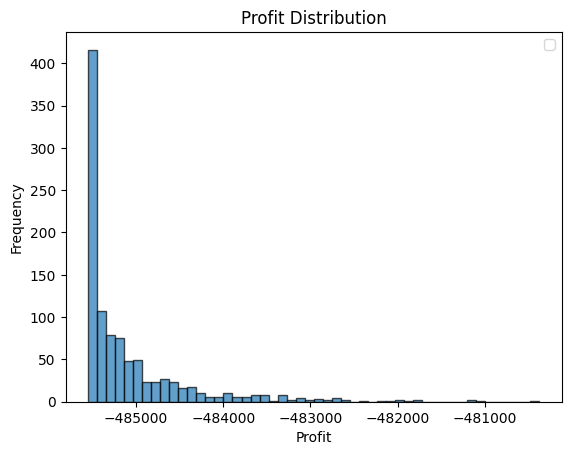

Optimal price for maximum profit: $10.46


In [57]:
# Monte Carlo simulation to estimate the optimal price that maximizes profit
#exponweib distribution

!pip install scipy
from scipy.stats import exponweib
import numpy as np
import matplotlib.pyplot as plt


# Generate demand and cost with normal distribution
n_iterations = 1000
#total_demand = np.random.normal(weekly_units_sold.mean(), weekly_units_sold.std(), n_iterations)
total_demand = weibull_min.rvs(37433303.52071972, -1326390893.686554, 1326391561.4502141, size=n_iterations)
total_cost = np.random.normal(weekly_total_cost.mean(), weekly_total_cost.std(), n_iterations)

# Generate price using the exponweib distribution
price_range = exponweib.rvs(0.5007514016703654, 0.9043675520762726, 2.492083333333333, 1.095788582086, size=n_iterations)

# Calculate profit for each combination of price and demand
profits = []
for p in price_range:
    profit = np.mean(p * total_demand - total_cost)
    profits.append(profit)

# Find optimal price that maximizes average profit
optimal_price = price_range[np.argmax(profits)]

# Optional: Plot profit distribution
plt.hist(profits, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Profit Distribution')
plt.legend()
plt.show()

print(f"Optimal price for maximum profit: ${optimal_price:.2f}")



In [58]:
# Parameters value for weekly_unit_price with beta distribution

from scipy.stats import beta

# Define the data
data = weekly_unit_price

# Fit the beta distribution to the data
params = beta.fit(data)

print(params)


(1132.7921209892966, 18.89710109961314, -12.25216721768124, 15.121406023410053)


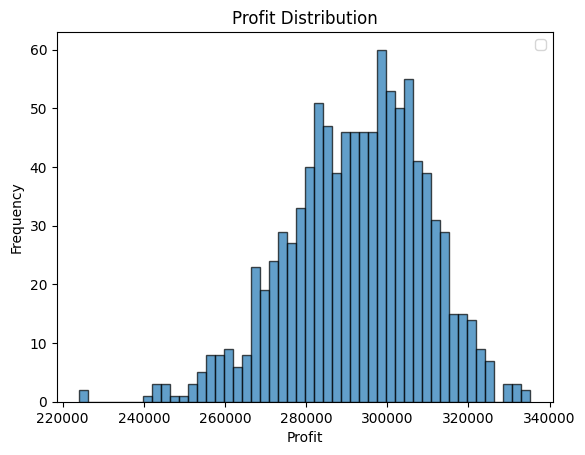

Optimal price for maximum profit: $2.77


In [60]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt



# Monte Carlo simulation to estimate the optimal price that maximizes profit.
#Price range with Beta Distribution

!pip install scipy


# Generate demand and cost using normal distribution
n_iterations = 1000
total_demand = np.random.normal(weekly_units_sold.mean(), weekly_units_sold.std(), n_iterations)
#total_demand = weibull_min.rvs(37433303.52071972, -1326390893.686554, 1326391561.4502141, size=n_iterations)
total_cost = np.random.normal(weekly_total_cost.mean(), weekly_total_cost.std(), n_iterations)

# Generate price using the beta distribution
price_range = beta.rvs(1132.7921209892966, 18.89710109961314, -12.25216721768124, 15.121406023410053, size=n_iterations)

# Calculate profit for each combination of price and demand
profits = []
for p in price_range:
    profit = np.mean(p * total_demand - total_cost)
    profits.append(profit)

# Find optimal price that maximizes average profit
optimal_price = price_range[np.argmax(profits)]

# Optional: Plot profit distribution
plt.hist(profits, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Profit Distribution')
plt.legend()
plt.show()

print(f"Optimal price for maximum profit: ${optimal_price:.2f}")


In [ ]:
weekly_unit_price.describe()

count    51.000000
mean      2.686110
std       0.047835
min       2.533015
25%       2.676262
50%       2.693358
75%       2.705748
max       2.843897
Name: unit_price, dtype: float64

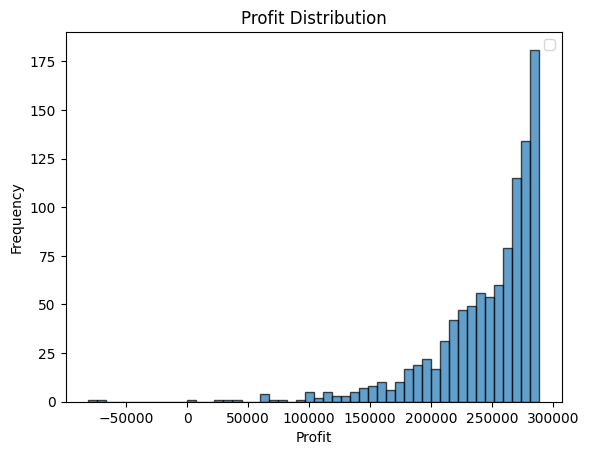

Optimal price for maximum profit: $2.77


In [ ]:
# Monte Carlo simulation to estimate the optimal price that maximizes profit
#exponweib distribution

!pip install scipy
from scipy.stats import weibull_max
import numpy as np
import matplotlib.pyplot as plt


# Generate demand and cost with normal distribution
n_iterations = 1000
total_demand = np.random.normal(weekly_units_sold.mean(), weekly_units_sold.std(), n_iterations)
total_cost = np.random.normal(weekly_total_cost.mean(), weekly_total_cost.std(), n_iterations)

# Generate price using the exponweib distribution
price_range = weibull_max.rvs(.8690680487221263, 2.773978587976038, 0.17164877009031315, size=n_iterations)

# Calculate profit for each combination of price and demand
profits = []
for p in price_range:
    profit = np.mean(p * total_demand - total_cost)
    profits.append(profit)

# Find optimal price that maximizes average profit
optimal_price = price_range[np.argmax(profits)]

# Optional: Plot profit distribution
plt.hist(profits, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Profit Distribution')
plt.legend()
plt.show()

print(f"Optimal price for maximum profit: ${optimal_price:.2f}")



In [61]:
weekly_unit_price.min()

2.4920833333333334

In [62]:
weekly_unit_price.max()

2.7538815789473685

In [63]:
weekly_unit_price.mean()

2.621227210182318

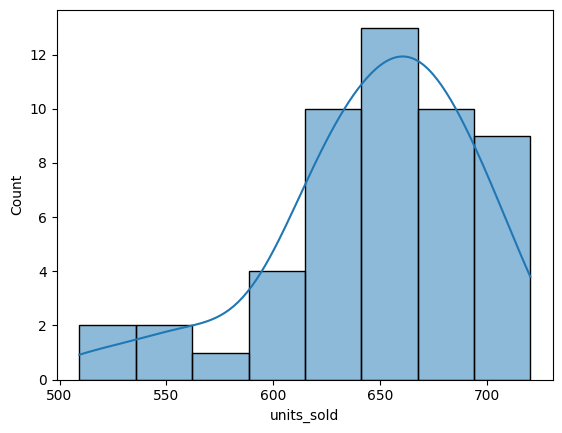

p value for norm = 0.7385800355199221


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:2008: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


p value for exponweib = 8.0542949745799e-33
p value for weibull_max = 2.148312108874288e-33
p value for weibull_min = 0.9681820770243774
p value for pareto = 7.391637483872249e-07
p value for genextreme = 0.8836520588046629
p value for gamma = 0.6279429195649873
p value for beta = 0.9177428449404926
p value for lognorm = 0.738553083244984
Best fitting distribution: weibull_min
Best p value: 0.9681820770243774
Parameters for the best fit: (37433303.52071972, -1326390893.686554, 1326391561.4502141)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a pandas DataFrame
data = average_weekly_units_sold

# Visual inspection
sns.histplot(data, kde=True)
plt.show()

# Define the distributions to test
dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", "gamma", "beta", "lognorm"]

# Fit your data to each distribution
dist_results = []
params = {}
for dist_name in dist_names:
    dist = getattr(st, dist_name)
    param = dist.fit(data)
    params[dist_name] = param
    # Apply the Kolmogorov-Smirnov test
    D, p = st.kstest(data, dist_name, args=param)
    print(f"p value for {dist_name} = {p}")
    dist_results.append((dist_name, p))

# Find the best fitting distribution
best_dist, best_p = max(dist_results, key=lambda item: item[1])
print(f"Best fitting distribution: {best_dist}")
print(f"Best p value: {best_p}")
print(f"Parameters for the best fit: {params[best_dist]}")

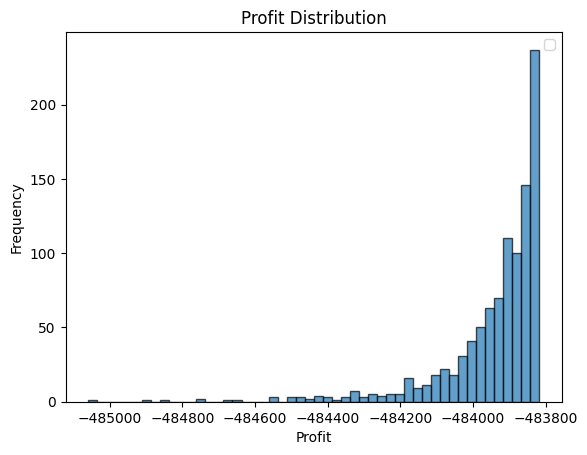

Optimal price for maximum profit: $2.77


In [53]:
# Monte Carlo simulation to estimate the optimal price that maximizes profit
#exponweib distribution

!pip install scipy
from scipy.stats import weibull_min, weibull_max
import numpy as np
import matplotlib.pyplot as plt


# Generate demand and cost with normal distribution
n_iterations = 1000
#total_demand = np.random.normal(weekly_units_sold.mean(), weekly_units_sold.std(), n_iterations)
total_cost = np.random.normal(weekly_total_cost.mean(), weekly_total_cost.std(), n_iterations)
total_demand = weibull_min.rvs(37433303.52071972, -1326390893.686554, 1326391561.4502141, size=n_iterations)

# Generate price using the exponweib distribution
price_range = weibull_max.rvs(.8690680487221263, 2.773978587976038, 0.17164877009031315, size=n_iterations)

# Calculate profit for each combination of price and demand
profits = []
for p in price_range:
    profit = np.mean(p * total_demand - total_cost)
    profits.append(profit)

# Find optimal price that maximizes average profit
optimal_price = price_range[np.argmax(profits)]

# Optional: Plot profit distribution
plt.hist(profits, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Profit Distribution')
plt.legend()
plt.show()

print(f"Optimal price for maximum profit: ${optimal_price:.2f}")
